In [1]:
import torch

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import time
from model import Model


In [2]:
# EXTRACT IMAGES

noisy_imgs_1 , noisy_imgs_2 = torch.load('train_data.pkl')
noisy_imgs , clean_imgs = torch.load ('val_data.pkl')

imgs_1 = noisy_imgs_1[0:10000]/255
imgs_2 = noisy_imgs_2[0:10000]/255

noisy_imgs = noisy_imgs/255
clean_imgs = clean_imgs/255


In [3]:
# CHECK PSNR

def psnr ( denoised , ground_truth ) :
        # Peak Signal to Noise Ratio : denoised and ground_truth have range [0 , 1]
        mse = torch.mean (( denoised - ground_truth ) ** 2)
        return -10 * torch.log10 ( mse + 10** -8)

In [4]:

model = Model()

model.train(imgs_1, imgs_2)


/Users/antoine/opt/anaconda3/envs/deep_learning_env/lib/python3.9/site-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/Users/antoine/opt/anaconda3/envs/deep_learning_env/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0 0.7430942133069038
1 0.6611754707992077
2 0.5486929044127464
3 0.4994046092033386
4 0.4653783328831196
5 0.45014963299036026
6 0.42430685460567474
7 0.41536951810121536
8 0.3943965248763561
9 0.3820047937333584
10 0.3898463621735573
11 0.3817599192261696
12 0.3684392459690571
13 0.382913738489151
14 0.3684685528278351
15 0.3588903956115246
16 0.3539947271347046
17 0.35089317709207535
18 0.34649696573615074
19 0.35852281749248505
20 0.34145987033843994
21 0.3452039249241352
22 0.3349998742341995
23 0.331546314060688
24 0.3575901985168457
25 0.34374580904841423
26 0.33232608437538147
27 0.3268747664988041
28 0.34044415690004826
29 0.34349125623703003
30 0.32843635976314545
31 0.32457741163671017
32 0.32601880468428135
33 0.3193622622638941
34 0.3240887578576803
35 0.31817460246384144
36 0.3202759828418493
37 0.3201843034476042
38 0.315260112285614
39 0.3311557322740555


In [8]:
out = model.predict(noisy_imgs)

img_denoise_psnr = psnr(out ,clean_imgs)

print("psnr", img_denoise_psnr)

psnr tensor(16.7033, grad_fn=<MulBackward0>)


In [6]:
# SAVE BEST MODEL

def save_model() -> None :
    torch.save(model.autoenc.state_dict(), 'bestmodel.pth')
    pass

save_model()


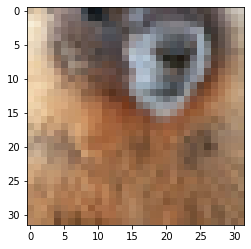

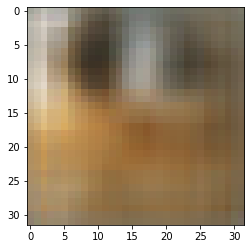

In [7]:
# AFFICHAGE

plt.imshow(clean_imgs[1].permute(1,2,0))
plt.show()
plt.imshow(out[1].permute(1,2,0).detach())
plt.show()